### 1. Study program dataset case study

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector

In [7]:
df=pd.read_csv('train.csv')
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [15]:
df.describe()

,ID,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
count,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,512087.000000,510323.000000,512087.000000
mean,274007.300650,434.917869,300.388344,0.380244,0.031639,0.488968,15375.101198,0.073345,120.826924
std,158228.834029,256.044161,173.365787,0.485447,0.175038,0.499879,7727.231205,0.100115,54.355258
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000
25%,136962.500000,214.000000,150.000000,0.000000,0.000000,0.000000,10584.000000,0.010000,84.000000
50%,273984.000000,427.000000,300.000000,0.000000,0.000000,0.000000,13776.000000,0.035000,111.000000
75%,411065.500000,658.000000,451.000000,1.000000,0.000000,1.000000,18123.000000,0.094000,146.000000
max,548027.000000,882.000000,600.000000,1.000000,1.000000,1.000000,100002.000000,0.768000,682.000000


In [14]:
df[df['Day_No']==1]

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
882,943,1,2,Development,Course,0,1,1,12663,0.186,97
1764,1885,1,3,Development,Program,0,1,0,11256,0.316,80
2646,2827,1,4,Development,Course,0,1,0,23625,0.099,207
3528,3769,1,5,Development,Program,0,1,0,14490,0.027,117
...,...,...,...,...,...,...,...,...,...,...,...
507677,543378,1,596,Development,Program,0,1,1,11298,0.070,100
508559,544320,1,597,Development,Course,0,1,1,10626,0.025,76
509441,545262,1,598,Finance & Accounting,Program,0,1,0,8505,0.025,85
510323,546204,1,599,Development,Program,0,1,0,14805,0.122,163


In [18]:
df.isnull().sum()/len(df)

ID                    0.000000
Day_No                0.000000
Course_ID             0.000000
Course_Domain         0.000000
Course_Type           0.000000
Short_Promotion       0.000000
Public_Holiday        0.000000
Long_Promotion        0.000000
User_Traffic          0.000000
Competition_Metric    0.003445
Sales                 0.000000
dtype: float64

In [19]:
df[df['Course_Domain']=='Development']

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41
...,...,...,...,...,...,...,...,...,...,...,...
511200,547081,878,599,Development,Program,0,0,0,14805,0.122,110
511201,547082,879,599,Development,Program,0,0,0,14259,0.122,124
511202,547083,880,599,Development,Program,0,0,0,12831,0.122,112
511203,547084,881,599,Development,Program,0,0,0,12978,0.122,105


In [20]:
df['Competition_Metric'].unique()

array([0.007, 0.186, 0.316, 0.099, 0.027, 0.041, 0.012, 0.014, 0.004,
       0.017, 0.054, 0.182, 0.042, 0.013, 0.06 , 0.001, 0.   , 0.129,
       0.029, 0.101, 0.056, 0.003, 0.002, 0.064, 0.237, 0.082, 0.006,
       0.4  , 0.009, 0.087, 0.097, 0.037, 0.049, 0.297, 0.015, 0.021,
       0.263, 0.046, 0.044, 0.295, 0.155, 0.024, 0.141, 0.032, 0.22 ,
       0.193, 0.116, 0.199, 0.005, 0.043, 0.104, 0.059, 0.075, 0.045,
       0.047, 0.768, 0.018, 0.01 , 0.016, 0.068, 0.334, 0.02 , 0.218,
       0.034, 0.419, 0.023, 0.214, 0.112, 0.039, 0.019, 0.035, 0.172,
       0.022, 0.076, 0.166, 0.255, 0.036, 0.051, 0.055, 0.084, 0.267,
       0.074, 0.09 , 0.198, 0.114, 0.008, 0.178, 0.028, 0.038, 0.142,
       0.229, 0.057, 0.061, 0.294, 0.202, 0.213, 0.122, 0.03 , 0.092,
         nan, 0.126, 0.261, 0.509, 0.025, 0.067, 0.149, 0.51 , 0.23 ,
       0.11 , 0.133, 0.053, 0.14 , 0.106, 0.123, 0.117, 0.109, 0.026,
       0.344, 0.121, 0.077, 0.108, 0.111, 0.091, 0.396, 0.171, 0.033,
       0.15 , 0.052,

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

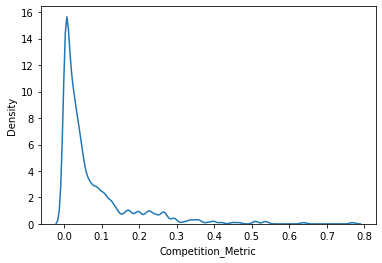

In [21]:
sns.kdeplot(df['Competition_Metric'])

In [24]:
df['Competition_Metric'].fillna(df['Competition_Metric'].median(),inplace=True)

In [26]:
df.drop(['ID'],axis=1,inplace=True)

In [30]:
df[df['Course_ID']==2]['Competition_Metric'].unique()

array([0.186])

C:\Users\GREAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='User_Traffic'>

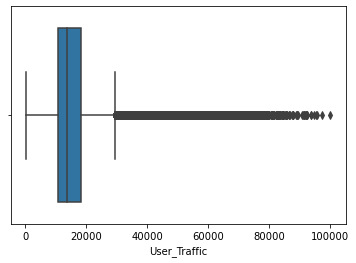

In [31]:
sns.boxplot(df['User_Traffic'])

C:\Users\GREAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Competition_Metric'>

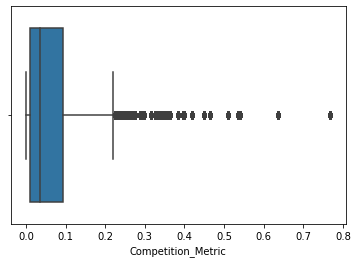

In [32]:
sns.boxplot(df['Competition_Metric'])

C:\Users\GREAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

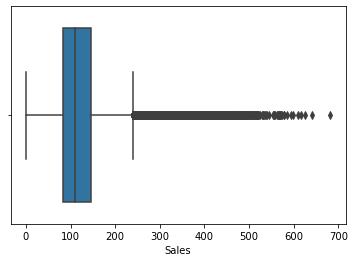

In [33]:
sns.boxplot(df['Sales'])

In [95]:
dff=df[['User_Traffic','Competition_Metric']]
q1=dff.quantile(0.25)
q3=dff.quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
ind=dff[((dff>ll) & (dff<ul)).any(axis=1)].index

In [96]:
df_wwo=df.iloc[ind]

### 2. Data Preparation

a. Fix the defects found above and do appropriate treatment if any.

b. Visualize the data using relevant plots. Find out the variables which are highly correlated with target variable? 

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take?  

d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? 
 

In [44]:
df[['User_Traffic','Competition_Metric','Sales']].corr()

,User_Traffic,Competition_Metric,Sales
User_Traffic,1.000000,-0.148185,0.829741
Competition_Metric,-0.148185,1.000000,-0.021716
Sales,0.829741,-0.021716,1.000000


<AxesSubplot:xlabel='Course_Domain'>

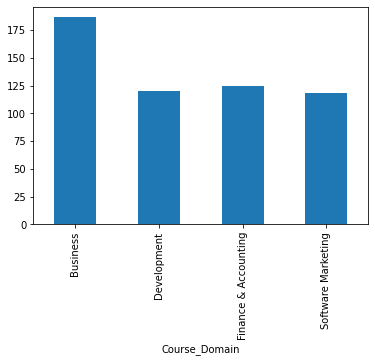

In [46]:
df.groupby('Course_Domain').mean()['Sales'].plot(kind='bar')

In [57]:
df_num=df[['User_Traffic','Competition_Metric','Sales']].reset_index(drop=True)
df_cat=df.iloc[:,0:7].reset_index(drop=True)

In [58]:
sc=StandardScaler()
df_num=pd.DataFrame(sc.fit_transform(df_num),columns=df_num.columns)

In [63]:
df=pd.concat([df_cat,df_num],axis=1)
df=pd.get_dummies(df,drop_first=True)

In [82]:
x=df.drop('Sales',axis=1)
y=df['Sales']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)

In [68]:
xtest

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
311266,853,364,0,0,0,0.640967,0.327975,0,0,1,0,1
362025,386,425,1,0,0,-0.541217,-0.282220,1,0,0,0,1
53255,44,63,0,0,0,0.064823,-0.302226,1,0,0,0,1
293670,161,344,0,0,1,-0.910819,0.628071,0,0,1,0,0
3424,779,4,1,0,0,0.130047,0.257953,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
366964,33,431,0,0,1,5.000101,-0.622329,0,0,0,1,0
258559,476,303,0,1,1,-1.655459,1.718420,0,0,1,0,0
272385,374,319,1,0,1,0.760545,-0.222201,0,0,1,0,0
496992,414,583,1,0,1,0.418119,1.468340,1,0,0,0,0


In [67]:
xtrain

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
42960,847,50,1,0,1,-0.239556,-0.672345,1,0,0,0,0
244512,687,286,0,0,1,-0.481428,1.238267,1,0,0,0,0
88134,233,104,0,0,1,-0.495016,0.928167,1,0,0,0,0
153364,823,180,1,1,0,-0.350980,-0.432268,1,0,0,0,0
373400,847,438,1,0,1,0.339307,-0.602323,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
339799,502,398,0,0,1,-0.473275,-0.542303,0,0,1,0,0
253799,824,297,0,0,0,0.072976,0.357985,1,0,0,0,1
210755,408,247,0,0,0,-0.511322,3.228904,1,0,0,0,1
56088,231,66,0,0,1,-0.666229,0.017876,0,0,1,0,1


In [83]:
stats.ttest_ind(ytrain,ytest)

Ttest_indResult(statistic=0.2754504663509787, pvalue=0.7829702875823137)

In [84]:
pd.DataFrame({'Variable':xtrain.columns,'pval':stats.ttest_ind(xtrain,xtest)[1]})

,Variable,pval
0,Day_No,0.093093
1,Course_ID,0.359458
2,Short_Promotion,0.712128
3,Public_Holiday,0.709652
4,Long_Promotion,0.283962
5,User_Traffic,0.709683
6,Competition_Metric,0.399138
7,Course_Domain_Development,0.582733
8,Course_Domain_Finance & Accounting,0.092960
9,Course_Domain_Software Marketing,0.457353


### 3. Model Building

a. Fit a base model and observe the overall R- Squared of the model. Please comment on whether it is good or not. 

b. Check for multi-collinearity and treat the same.

c. How would you improve the model? Write clearly the changes that you will make before refitting the model. Fit the final model.   


In [106]:
x=df.drop('Sales',axis=1)
y=df['Sales']
xc=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,test_size=.3,random_state=1)
ols_model=sm.OLS(ytrain,xtrain).fit()
ols_model.summary()

C:\Users\GREAT\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                 1.466e+05
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:36:21   Log-Likelihood:            -1.8989e+05
No. Observations:              358460   AIC:                         3.798e+05
Df Residuals:                  358447   BIC:                         3.799e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.6367      0.010   -164.966      0.000      -1.656      -1.617
Day_No                                 0.0002   2.69e-06     59.876      0.000       0.000       0.000
Course_ID                          -2.293e-05   3.99e-06     -5.751      0.000   -3.07e-05   -1.51e-05
Short_Promotion                        0.3653      0.001    251.400      0.000       0.362       0.368
Public_Holiday                        -0.1736      0.004    -43.878      0.000      -0.181      -0.166
Long_Promotion                         0.1262      0.001     87.617      0.000       0.123       0.129
User_Traffic                           0.9528      0.001   1153.778      0.000       0.951       0.954
Competition_Metric                     0.0789      0.001    109.776      0.000       0.077       0.080
Course_Domain_Development              1.2338      0.010    124.884      0.000       1.214       1.253
Course_Domain_Finance & Accounting     1.1976      0.010    119.962      0.000       1.178       1.217
Course_Domain_Software Marketing       1.6137      0.010    160.794      0.000       1.594       1.633
Course_Type_Degree                    -2.6166      0.015   -170.928      0.000      -2.647      -2.587
Course_Type_Program                    0.0963      0.001     67.331      0.000       0.094       0.099
==============================================================================
Omnibus:                    62573.792   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           316788.773
Skew:                           0.759   Prob(JB):                         0.00
Kurtosis:                       7.348   Cond. No.                     1.88e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
r2 for train > r2 of testing
rmse for train < rmse of testing 

In [87]:
ytrain_pred=ols_model.predict(xtrain)
ytest_pred=ols_model.predict(xtest)
r2_score(ytest,ytest_pred)

0.8318248448729376

In [89]:
print('RMSE for train',np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print('RMSE for test',np.sqrt(mean_squared_error(ytest,ytest_pred)))

RMSE for train 0.41098379652877204
RMSE for test 0.4110978489901775


In [98]:
df_wwo

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,1,1,0,1,1,-0.565676,-0.662342,-0.732716,1,0,0,0,0
1,2,1,0,0,1,-0.223250,-0.662342,-0.769511,1,0,0,0,0
2,3,1,0,0,1,-0.481428,-0.662342,-0.843101,1,0,0,0,0
3,4,1,0,0,1,-0.429792,-0.662342,-0.751113,1,0,0,0,0
4,5,1,0,0,1,-1.109208,-0.662342,-1.468616,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512082,878,600,0,0,1,-0.837442,-0.032140,-0.125598,0,0,1,0,1
512083,879,600,0,0,1,-0.625464,-0.032140,0.444724,0,0,1,0,1
512084,880,600,0,0,1,-0.220532,-0.032140,0.849469,0,0,1,0,1
512085,881,600,0,0,1,-0.837442,-0.032140,-0.254381,0,0,1,0,1


In [99]:
x=df_wwo.drop('Sales',axis=1)
y=df_wwo['Sales']
xc=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,test_size=.3,random_state=1)
ols_model=sm.OLS(ytrain,xtrain).fit()
ols_model.summary()

C:\Users\GREAT\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                 1.450e+05
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:26:14   Log-Likelihood:            -1.8877e+05
No. Observations:              357770   AIC:                         3.776e+05
Df Residuals:                  357757   BIC:                         3.777e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.6216      0.010   -163.441      0.000      -1.641      -1.602
Day_No                                 0.0002   2.68e-06     58.861      0.000       0.000       0.000
Course_ID                          -2.103e-05   3.98e-06     -5.282      0.000   -2.88e-05   -1.32e-05
Short_Promotion                        0.3658      0.001    251.897      0.000       0.363       0.369
Public_Holiday                        -0.1751      0.004    -44.386      0.000      -0.183      -0.167
Long_Promotion                         0.1258      0.001     87.557      0.000       0.123       0.129
User_Traffic                           0.9496      0.001   1144.740      0.000       0.948       0.951
Competition_Metric                     0.0775      0.001    107.105      0.000       0.076       0.079
Course_Domain_Development              1.2186      0.010    123.320      0.000       1.199       1.238
Course_Domain_Finance & Accounting     1.1828      0.010    118.462      0.000       1.163       1.202
Course_Domain_Software Marketing       1.5978      0.010    159.205      0.000       1.578       1.617
Course_Type_Degree                    -2.6006      0.015   -170.422      0.000      -2.631      -2.571
Course_Type_Program                    0.0976      0.001     68.373      0.000       0.095       0.100
==============================================================================
Omnibus:                    64982.058   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           364027.158
Skew:                           0.763   Prob(JB):                         0.00
Kurtosis:                       7.700   Cond. No.                     1.89e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [100]:
ytrain_pred=ols_model.predict(xtrain)
ytest_pred=ols_model.predict(xtest)
r2_score(ytest,ytest_pred)

0.829719572469882

In [101]:
print('RMSE for train',np.sqrt(mean_squared_error(ytrain,ytrain_pred)))
print('RMSE for test',np.sqrt(mean_squared_error(ytest,ytest_pred)))

RMSE for train 0.41011755032252295
RMSE for test 0.41027889600194045


In [107]:
vif=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
VIF=pd.DataFrame()
VIF['Variables']=xtrain.columns
VIF['vif']=vif

In [108]:
VIF

,Variables,vif
0,const,208.897182
1,Day_No,1.001378
2,Course_ID,1.015533
3,Short_Promotion,1.056080
4,Public_Holiday,1.015811
5,Long_Promotion,1.099401
6,User_Traffic,1.445458
7,Competition_Metric,1.096703
8,Course_Domain_Development,51.729479
9,Course_Domain_Finance & Accounting,27.161633


In [110]:
xtrain.drop('Course_Domain_Development',axis=1,inplace=True)
vif=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]
VIF=pd.DataFrame()
VIF['Variables']=xtrain.columns
VIF['vif']=vif
VIF

,Variables,vif
0,const,9.826565
1,Day_No,1.001362
2,Course_ID,1.012653
3,Short_Promotion,1.053340
4,Public_Holiday,1.015133
5,Long_Promotion,1.098675
6,User_Traffic,1.371899
7,Competition_Metric,1.096697
8,Course_Domain_Finance & Accounting,1.113772
9,Course_Domain_Software Marketing,1.254444


In [111]:
x=df.drop(['Sales','Course_Domain_Development'],axis=1)
y=df['Sales']
xc=sm.add_constant(x)
xtrain,xtest,ytrain,ytest=train_test_split(xc,y,test_size=.3,random_state=1)
ols_model=sm.OLS(ytrain,xtrain).fit()
ols_model.summary()

C:\Users\GREAT\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 1.519e+05
Date:                Tue, 14 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:40:34   Log-Likelihood:            -1.9752e+05
No. Observations:              358460   AIC:                         3.951e+05
Df Residuals:                  358448   BIC:                         3.952e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -0.4272      0.002   -194.329      0.000      -0.431      -0.423
Day_No                                 0.0002   2.74e-06     59.106      0.000       0.000       0.000
Course_ID                           3.586e-06   4.07e-06      0.882      0.378   -4.39e-06    1.16e-05
Short_Promotion                        0.3745      0.001    252.659      0.000       0.372       0.377
Public_Holiday                        -0.1864      0.004    -46.126      0.000      -0.194      -0.178
Long_Promotion                         0.1215      0.001     82.656      0.000       0.119       0.124
User_Traffic                           0.9295      0.001   1131.046      0.000       0.928       0.931
Competition_Metric                     0.0790      0.001    107.732      0.000       0.078       0.080
Course_Domain_Finance & Accounting    -0.0233      0.002    -11.286      0.000      -0.027      -0.019
Course_Domain_Software Marketing       0.3773      0.002    224.845      0.000       0.374       0.381
Course_Type_Degree                    -3.7139      0.013   -290.022      0.000      -3.739      -3.689
Course_Type_Program                    0.1105      0.001     75.861      0.000       0.108       0.113
==============================================================================
Omnibus:                    56779.962   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403314.266
Skew:                           0.575   Prob(JB):                         0.00
Kurtosis:                       8.068   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
from sklearn.linear_model import SGDRegressor

In [115]:
x=df.drop(['Sales','Course_Domain_Development'],axis=1)
y=df['Sales']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
sgd=SGDRegressor()
sgd_model=sgd.fit(xtrain,ytrain)

In [119]:
ytrain_pred=sgd_model.predict(xtrain)
ytest_pred=sgd_model.predict(xtest)

In [120]:
pd.DataFrame({'True':ytrain,'Pred':ytrain_pred})

,True,Pred
437273,-0.199188,-5.291490e+13
428885,-0.659126,-6.892341e+13
225726,-0.769511,-4.451325e+13
128604,3.572300,-3.928055e+13
337398,0.647097,-5.972581e+13
...,...,...
491263,0.039979,-7.199821e+13
267336,0.573507,-4.896246e+13
470924,-0.935088,-1.970312e+13
491755,0.886264,-4.647204e+13


In [121]:
from sklearn.model_selection import GridSearchCV

In [123]:
x=df.drop(['Sales','Course_Domain_Development'],axis=1)
y=df['Sales']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.3,random_state=1)
ols=sm.OLS(ytrain,xtrain).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Sales   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                          1.343e+05
Date:                Tue, 14 Feb 2023   Prob (F-statistic):                        0.00
Time:                        16:27:45   Log-Likelihood:                     -2.1548e+05
No. Observations:              358460   AIC:                                  4.310e+05
Df Residuals:                  358449   BIC:                                  4.311e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Day_No                                -0.0001   2.42e-06    -52.532      0.000      -0.000      -0.000
Course_ID                             -0.0004   3.59e-06   -118.810      0.000      -0.000      -0.000
Short_Promotion                        0.3069      0.002    202.595      0.000       0.304       0.310
Public_Holiday                        -0.2266      0.004    -53.421      0.000      -0.235      -0.218
Long_Promotion                         0.0325      0.001     22.147      0.000       0.030       0.035
User_Traffic                           0.9266      0.001   1072.597      0.000       0.925       0.928
Competition_Metric                     0.0785      0.001    101.779      0.000       0.077       0.080
Course_Domain_Finance & Accounting    -0.0875      0.002    -40.810      0.000      -0.092      -0.083
Course_Domain_Software Marketing       0.3264      0.002    187.296      0.000       0.323       0.330
Course_Type_Degree                    -3.7073      0.013   -275.368      0.000      -3.734      -3.681
Course_Type_Program                    0.0444      0.001     29.801      0.000       0.041       0.047
==============================================================================
Omnibus:                    57779.099   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           345383.548
Skew:                           0.643   Prob(JB):                         0.00
Kurtosis:                       7.633   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
ytest_pred=ols.predict(xtest)
r2_score(ytest,ytest_pred)

0.8065223112460266

In [128]:
lr=LinearRegression()
lr_model=lr.fit(xtrain,ytrain)
lr_model.score(xtrain,ytrain)   
lr_model.score(xtest,ytest)

0.8254866660148547

In [132]:
sfs=SequentialFeatureSelector(estimator=lr,cv=3,scoring='r2',k_features='best')
sfs_model=sfs.fit(xtrain,ytrain)
sfs_model.k_feature_names_

('Day_No',
 'Short_Promotion',
 'Public_Holiday',
 'Long_Promotion',
 'User_Traffic',
 'Competition_Metric',
 'Course_Domain_Finance & Accounting',
 'Course_Domain_Software Marketing',
 'Course_Type_Degree',
 'Course_Type_Program')

In [133]:
xtrain.shape

(358460, 11)

In [137]:
pd.DataFrame({'Variable':xtrain.columns,'pval':lr_model.coef_})

,Variable,pval
0,Day_No,0.000162
1,Course_ID,0.000004
2,Short_Promotion,0.374543
3,Public_Holiday,-0.186352
4,Long_Promotion,0.121533
5,User_Traffic,0.929491
6,Competition_Metric,0.079048
7,Course_Domain_Finance & Accounting,-0.023306
8,Course_Domain_Software Marketing,0.377276
9,Course_Type_Degree,-3.713885
